<a href="https://colab.research.google.com/github/DrakeCS167Fall22/cs167fall22project1-GavinEldridge/blob/main/Copy_of_CS_167_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1
# Name: Gavin Eldridge

In [72]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# load data
car_data = pandas.read_csv('/content/drive/MyDrive/CS167datasets/CarPricesProject1.csv')
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments - creation of dummy variables, filling in missing values, etc.

For my data Preparation I started off with making a copy of the original data and then immediately dropping the car names value because I did not think that would be a use for it in the models. Then I went through and filled all missing values in numeric data columns with the averages found in that column. I then replaced the doornumber and cylindernumber columns to contain actual numbers instead of them written. I decided to keep cylindernumber numeric instead of a dummy because I felt that it was valid that a 2 cylinder car and an 8 cylinder car have more of a difference than 2 to 4. I did this to door number because through personal experience 2 doors is associated with more sports and luxurious cars, which are more expensive, rather than four doors so I wanted to allow that variable to have the biggest impact it could have as well. For the rest of the variables I made them into dummy variables so that they could still be used in our prediction. I decided to keep all variables for now so that testing would not be limited right away.

In [74]:
clean_data = car_data.copy()
clean_data.drop(columns= ['CarName'], inplace = True)
print(clean_data.head())

clean_data['symboling'].fillna(clean_data['symboling'].mean(), inplace = True)
clean_data['wheelbase'].fillna(clean_data['wheelbase'].mean(), inplace = True)
clean_data['carlength'].fillna(clean_data['carlength'].mean(), inplace = True)
clean_data['carwidth'].fillna(clean_data['carwidth'].mean(), inplace = True)
clean_data['carheight'].fillna(clean_data['carheight'].mean(), inplace = True)
clean_data['curbweight'].fillna(clean_data['curbweight'].mean(), inplace = True)
clean_data['enginesize'].fillna(clean_data['enginesize'].mean(), inplace = True)
clean_data['boreratio'].fillna(clean_data['boreratio'].mean(), inplace = True)
clean_data['stroke'].fillna(clean_data['stroke'].mean(), inplace = True)
clean_data['compressionratio'].fillna(clean_data['compressionratio'].mean(), inplace = True)
clean_data['horsepower'].fillna(clean_data['horsepower'].mean(), inplace = True)
clean_data['peakrpm'].fillna(clean_data['peakrpm'].mean(), inplace = True)
clean_data['citympg'].fillna(clean_data['citympg'].mean(), inplace = True)
clean_data['highwaympg'].fillna(clean_data['highwaympg'].mean(), inplace = True)
clean_data['price'].fillna(clean_data['price'].mean(), inplace = True)

clean_data['doornumber'].replace(['two','four'], [2,4], inplace = True)
clean_data['doornumber'].fillna(clean_data['doornumber'].median(), inplace = True)
clean_data['cylindernumber'].replace(['two','three','four','five','six','eight','twelve'], [2,3,4,5,6,8,12], inplace = True)
clean_data['cylindernumber'].fillna(clean_data['cylindernumber'].median(), inplace = True)

clean_data = pandas.get_dummies(clean_data, columns =['fueltype','aspiration','drivewheel','carbody', 'enginelocation', 'enginetype', 'fuelsystem'])
print(clean_data.isna().any())


   symboling fueltype aspiration doornumber      carbody drivewheel  \
0        3.0      gas        std        two  convertible        rwd   
1        3.0      gas        std        two  convertible        rwd   
2        1.0      gas        std        two    hatchback        rwd   
3        2.0      gas        std       four        sedan        fwd   
4        2.0      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...       130.0        mpfi   
1          front       88.6      168.8      64.1  ...       130.0        mpfi   
2          front       94.5      171.2      65.5  ...       152.0        mpfi   
3          front       99.8      176.6      66.2  ...       109.0        mpfi   
4          front       99.4      176.6      66.4  ...       136.0        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  highwaympg  \
0    

# Part 1: Regression
How well can you predict target value `price`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


For metrics we will be using R squared and mean-squared-error to see the accuracy of our data in this regression model. These metrics do a great job of showing how far off are prediction is. For R^2 if we get a value of 1, that means we did a perfect job fitting our model to the test data and we get a 0 value if our model just guesses the average everytime. MSE is also another metric to show how far off predictions are except we want the lowest MSE possible however with so many predictor variables our MSE will be a large number. With these metrics I will be focusing on the model's R^2 value first and then using the MSE as backup if two K or max_depth values are pretty similar to see which one should be used in the final model. Im hoping to get an R^2 value above 0.5 but would like to see it between 0.7 and 0.8 because then we would have a pretty good model. Anything over 0 would be good because it would be a sign that our model does a better job than just a random guess or average guess.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [75]:
#Splitting data for testing our model
target = 'price'
predictors = clean_data.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
        train_test_split(clean_data[predictors], clean_data[target], test_size = 0.2, random_state=41)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [76]:
#code for KNN
neigh = neighbors.KNeighborsRegressor(n_neighbors = 5) ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)
# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)
current_accuracy = metrics.r2_score(test_sln, predictions)

In [77]:
#code for w-knn
neighw = neighbors.KNeighborsRegressor(n_neighbors= 5,weights = 'distance') ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
neighw.fit(train_data_normalized, train_sln)
# use the trained model to get predictions from our test_data
predictionsw = neighw.predict(test_data_normalized)

In [78]:
#code for Decision trees
dt = tree.DecisionTreeRegressor()
#4. Call fit (to train the classification/regression model)
dt.fit(train_data_normalized, train_sln)
#5. Call predict to generate predictions
P_predictions = dt.predict(test_data_normalized)

3 10209259.370117318
5 14767887.31240914
7 11707807.800195482
9 12022856.002983792
11 11174508.598270716
13 10555889.756037738
15 11353372.439159524
17 11701150.733452471


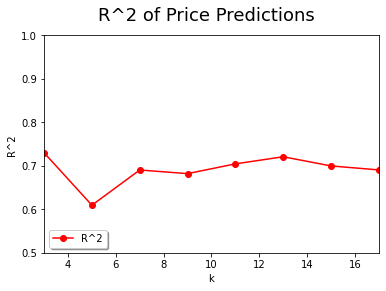

In [79]:
#Graph for knn 
import matplotlib.pyplot as plt
%matplotlib inline
k_vals = [3,5,7,9,11,13,15,17]
kNN_accuracies = []
for k in k_vals:
    neigh = neighbors.KNeighborsRegressor(n_neighbors = k) ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
    neigh.fit(train_data_normalized, train_sln)
# use the trained model to get predictions from our test_data
    predictions = neigh.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, predictions)
    kNN_accuracies.append(current_accuracy)
    print(k, metrics.mean_squared_error(test_sln, predictions))

plt.suptitle('R^2 of Price Predictions',fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(k_vals,kNN_accuracies,"ro-",label='R^2')
plt.legend(loc='lower left', shadow=True)
plt.axis([3,17,0.5,1])

plt.show()

#Best K Value is 13

3 9838884.927963385
5 12253498.939180624
7 9722963.545887109
9 10870931.026315846
11 10120331.339247284
13 9661040.21083177
15 10338866.601146827
17 10709605.35421488


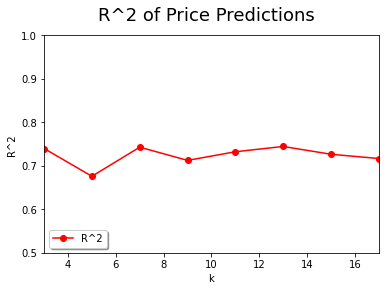

In [80]:
#graph for Wknn
k_vals = [3,5,7,9,11,13,15,17]
wkNN_accuracies = []
for k in k_vals:
    neighw = neighbors.KNeighborsRegressor(n_neighbors= k ,weights = 'distance')### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
    neighw.fit(train_data_normalized, train_sln)
# use the trained model to get predictions from our test_data
    predictionsw = neighw.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, predictionsw)
    wkNN_accuracies.append(current_accuracy)
    print(k, metrics.mean_squared_error(test_sln, predictionsw))

plt.suptitle('R^2 of Price Predictions',fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(k_vals,wkNN_accuracies,"ro-",label='R^2')

plt.legend(loc='lower left', shadow=True)
plt.axis([3,17,0.5,1])

plt.show()

#Best K value is 13

3 12523041.214834794
5 11877423.413371645
7 9093143.908204248
9 14582049.09861182
11 13325019.975459844
13 12194912.572039124
15 13372271.468380587
17 12580598.98545376


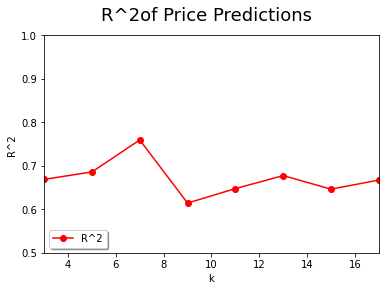

In [81]:
#graph for decision trees
k_vals = [3,5,7,9,11,13,15,17]
dt_accuracies = []
for k in k_vals:
    dt = tree.DecisionTreeRegressor(max_depth=k)

#4. Call fit (to train the classification/regression model)
    dt.fit(train_data_normalized, train_sln)

#5. Call predict to generate predictions
    predictions = dt.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, predictions)
    dt_accuracies.append(current_accuracy)
    print(k, metrics.mean_squared_error(test_sln, predictions))

plt.suptitle('R^2of Price Predictions',fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(k_vals,dt_accuracies,"ro-",label='R^2')
plt.legend(loc='lower left', shadow=True)
plt.axis([3,17,0.5,1])

plt.show()

#Best Max depth was 5

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.

From our testing graphs I found that W-knn was the best model for predicting our testing solutions so I decided to move on using that

3 5027118.053772381
0.8670559155132422
5 4752417.205720813
0.8743204858617637
7 5131246.136653919
0.8643022080212013
9 5195776.494687395
0.8625956777033136
11 5313568.134410835
0.8594806321571928
13 5897052.251303824
0.8440501686384988
15 6173658.404649754
0.8367352117533341
17 7003468.362051263
0.8147905659533502


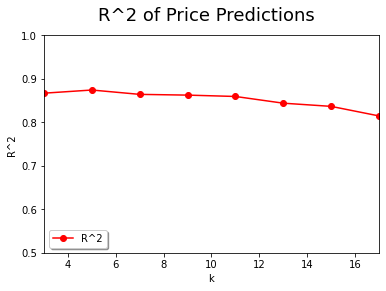

In [82]:
target4 = 'price'
predictors4 = ['enginesize', 'cylindernumber','wheelbase', 'curbweight','boreratio','horsepower','peakrpm']
train_data4, test_data4, train_sln4, test_sln4 = \
        train_test_split(clean_data[predictors4], clean_data[target4], test_size = 0.2, random_state=41)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data4)
train_data_normalized4 = scaler.transform(train_data4)
test_data_normalized4 = scaler.transform(test_data4)

#graph for Wknn
k_vals4 = [3,5,7,9,11,13,15,17]
wkNN4_accuracies = []
for k in k_vals4:
    neighw4 = neighbors.KNeighborsRegressor(n_neighbors= k ,weights = 'distance')### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
    neighw4.fit(train_data_normalized4, train_sln4)
# use the trained model to get predictions from our test_data
    predictionsw4 = neighw4.predict(test_data_normalized4)
    current_accuracy4 = metrics.r2_score(test_sln4, predictionsw4)
    wkNN4_accuracies.append(current_accuracy4)
    print(k, metrics.mean_squared_error(test_sln4, predictionsw4))
    print(current_accuracy4)
plt.suptitle('R^2 of Price Predictions',fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(k_vals4,wkNN4_accuracies,"ro-",label='R^2')

plt.legend(loc='lower left', shadow=True)
plt.axis([3,17,0.5,1])

plt.show()



- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

In [83]:
#competition model
'''
target4 = 'price'
predictors4 = ['enginesize', 'cylindernumber','wheelbase', 'curbweight','boreratio','horsepower','peakrpm']
train_data4, test_data4, train_sln4, test_sln4 = \
        train_test_split(clean_data[predictors4], clean_data[target4], test_size = 0.2, random_state=41)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data4)
train_data_normalized4 = scaler.transform(train_data4)
test_data_normalized4 = scaler.transform(test_data4)

neighw4 = neighbors.KNeighborsRegressor(n_neighbors= 5,weights = 'distance') ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
neighw4.fit(train_data_normalized4, train_sln4)
# use the trained model to get predictions from our test_data
predictionsw4 = neighw4.predict(test_data_normalized4)
'''



"\ntarget4 = 'price'\npredictors4 = ['enginesize', 'cylindernumber','wheelbase', 'curbweight','boreratio','horsepower','peakrpm']\ntrain_data4, test_data4, train_sln4, test_sln4 =         train_test_split(clean_data[predictors4], clean_data[target4], test_size = 0.2, random_state=41)\n\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(train_data4)\ntrain_data_normalized4 = scaler.transform(train_data4)\ntest_data_normalized4 = scaler.transform(test_data4)\n\nneighw4 = neighbors.KNeighborsRegressor(n_neighbors= 5,weights = 'distance') ### Don't miss this! Doing Regression here!!\n# fit (train) the model to the data\nneighw4.fit(train_data_normalized4, train_sln4)\n# use the trained model to get predictions from our test_data\npredictionsw4 = neighw4.predict(test_data_normalized4)\n"

After testing the different models I felt like the weighted Knn did the best job for predicting based of R^2 and MSE values. In my initial models I tested with different k values and changed some of the other paramaters like algorithm and distance equation(Euclidean vs Minkowski). After testing I found that the default parameters beside k value were best when at the default setting. I then used the WKNN model in my fine tuning to find the best variables to predict price. I tried it with variables that were similar and some random variables put together and ended up with these varaibles. I chose these variables because these were the ones to help improve my model past where it was in the initial model testing. My prediction for the competition set is that it will do well or really bad as I don't know if these certain variables being used are great predictors or just work well on my specific test data

# Part 2: Classification
How well can you predict `carbody`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


Using Accuracy which is a measure of how often our model returns the right answer as our metric to see how well our model is doing. My baseline is zero because if our model is greater than 0 then it means that it is improving itself over just an average guess.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [84]:
clean_data2 = pandas.read_csv('/content/drive/MyDrive/CS167datasets/CarPricesProject1.csv')
clean_data2.drop(columns= ['CarName'], inplace = True)
print(clean_data2.head())

clean_data2['symboling'].fillna(clean_data2['symboling'].mean(), inplace = True)
clean_data2['wheelbase'].fillna(clean_data2['wheelbase'].mean(), inplace = True)
clean_data2['carlength'].fillna(clean_data2['carlength'].mean(), inplace = True)
clean_data2['carwidth'].fillna(clean_data2['carwidth'].mean(), inplace = True)
clean_data2['carheight'].fillna(clean_data2['carheight'].mean(), inplace = True)
clean_data2['curbweight'].fillna(clean_data2['curbweight'].mean(), inplace = True)
clean_data2['enginesize'].fillna(clean_data2['enginesize'].mean(), inplace = True)
clean_data2['boreratio'].fillna(clean_data2['boreratio'].mean(), inplace = True)
clean_data2['stroke'].fillna(clean_data2['stroke'].mean(), inplace = True)
clean_data2['compressionratio'].fillna(clean_data2['compressionratio'].mean(), inplace = True)
clean_data2['horsepower'].fillna(clean_data2['horsepower'].mean(), inplace = True)
clean_data2['peakrpm'].fillna(clean_data2['peakrpm'].mean(), inplace = True)
clean_data2['citympg'].fillna(clean_data2['citympg'].mean(), inplace = True)
clean_data2['highwaympg'].fillna(clean_data2['highwaympg'].mean(), inplace = True)
clean_data2['price'].fillna(clean_data2['price'].mean(), inplace = True)

clean_data2['doornumber'].replace(['two','four'], [2,4], inplace = True)
clean_data2['doornumber'].fillna(clean_data2['doornumber'].median(), inplace = True)
clean_data2['cylindernumber'].replace(['two','three','four','five','six','eight','twelve'], [2,3,4,5,6,8,12], inplace = True)
clean_data2['cylindernumber'].fillna(clean_data2['cylindernumber'].median(), inplace = True)

clean_data2 = pandas.get_dummies(clean_data2, columns =['fueltype','aspiration','drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])
clean_data2 = clean_data2.dropna(axis = 0, subset=['carbody'])
print(clean_data2.isna().any())
print(clean_data2.shape)

   symboling fueltype aspiration doornumber      carbody drivewheel  \
0        3.0      gas        std        two  convertible        rwd   
1        3.0      gas        std        two  convertible        rwd   
2        1.0      gas        std        two    hatchback        rwd   
3        2.0      gas        std       four        sedan        fwd   
4        2.0      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...       130.0        mpfi   
1          front       88.6      168.8      64.1  ...       130.0        mpfi   
2          front       94.5      171.2      65.5  ...       152.0        mpfi   
3          front       99.8      176.6      66.2  ...       109.0        mpfi   
4          front       99.4      176.6      66.4  ...       136.0        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  highwaympg  \
0    

In [85]:
#Splitting data for testing our model
target2 = 'carbody'
predictors2 = clean_data2.columns.drop(target2)
train_data2, test_data2, train_sln2, test_sln2 = \
        train_test_split(clean_data2[predictors2], clean_data2[target2], test_size = 0.2, random_state=41)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data2)
train_data_normalized2 = scaler.transform(train_data2)
test_data_normalized2 = scaler.transform(test_data2)


In [86]:
neighc = neighbors.KNeighborsClassifier(n_neighbors = 5) ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
neighc.fit(train_data_normalized2, train_sln2)
# use the trained model to get predictions from our test_data
predictionsc = neighc.predict(test_data_normalized2)
print(predictionsc)
print(test_sln2)

['sedan' 'sedan' 'sedan' 'sedan' 'sedan' 'sedan' 'wagon' 'sedan'
 'hatchback' 'convertible' 'hatchback' 'hatchback' 'hatchback' 'sedan'
 'sedan' 'sedan' 'hatchback' 'sedan' 'sedan' 'sedan' 'sedan' 'sedan'
 'sedan' 'sedan' 'sedan' 'sedan' 'convertible' 'sedan' 'sedan' 'wagon'
 'sedan' 'sedan' 'hatchback' 'sedan' 'sedan' 'hatchback' 'sedan'
 'hatchback' 'sedan' 'sedan' 'hatchback']
97           wagon
63           sedan
172    convertible
201          sedan
68           wagon
9        hatchback
155          wagon
92           sedan
51       hatchback
166      hatchback
30       hatchback
124      hatchback
29       hatchback
14           sedan
169      hatchback
168        hardtop
91           sedan
199          wagon
38       hatchback
138      hatchback
189    convertible
11           sedan
49           sedan
187          sedan
174          sedan
171      hatchback
178      hatchback
109          wagon
61       hatchback
145          sedan
66           sedan
117          sedan
22       

In [87]:
#code for WKnn classifier
neighwc = neighbors.KNeighborsClassifier(n_neighbors= 3,weights = 'distance') ### Don't miss this! Doing Regression here!!
# fit (train) the model to the data
neighwc.fit(train_data_normalized2, train_sln2)
# use the trained model to get predictions from our test_data
predictionswc = neighwc.predict(test_data_normalized2)
print(predictionswc)

['wagon' 'sedan' 'hardtop' 'sedan' 'sedan' 'sedan' 'wagon' 'sedan'
 'hatchback' 'sedan' 'hatchback' 'hatchback' 'hatchback' 'sedan' 'hardtop'
 'hardtop' 'sedan' 'sedan' 'hatchback' 'hatchback' 'sedan' 'sedan'
 'convertible' 'sedan' 'sedan' 'hardtop' 'hatchback' 'sedan' 'hatchback'
 'wagon' 'sedan' 'sedan' 'hatchback' 'sedan' 'sedan' 'hardtop' 'hardtop'
 'hatchback' 'sedan' 'sedan' 'hatchback']


In [88]:
#code for Decision trees
dtc = tree.DecisionTreeClassifier()
#4. Call fit (to train the classification/regression model)
dtc.fit(train_data_normalized2, train_sln2)
#5. Call predict to generate predictions
C_predictions = dtc.predict(test_data_normalized2)

print(C_predictions)

['wagon' 'sedan' 'hardtop' 'sedan' 'wagon' 'sedan' 'wagon' 'sedan'
 'hatchback' 'sedan' 'hatchback' 'hatchback' 'hatchback' 'sedan' 'hardtop'
 'hardtop' 'hatchback' 'wagon' 'hatchback' 'hatchback' 'hatchback' 'sedan'
 'sedan' 'sedan' 'sedan' 'hardtop' 'hatchback' 'wagon' 'hatchback' 'sedan'
 'sedan' 'sedan' 'hatchback' 'sedan' 'hatchback' 'hatchback' 'hardtop'
 'hatchback' 'sedan' 'sedan' 'hatchback']


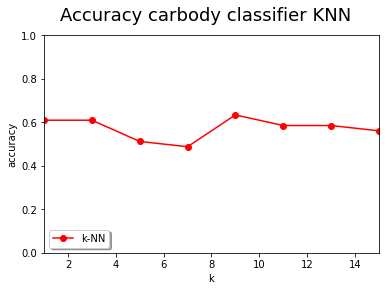

In [89]:
ck_vals = [1,3,5,7,9,11,13,15]
ckNN_accuracies = []

for k in ck_vals:
    neighc = neighbors.KNeighborsClassifier(n_neighbors = k) ### Don't miss this! Doing Regression here!!
    # fit (train) the model to the data
    neighc.fit(train_data_normalized2, train_sln2)
    # use the trained model to get predictions from our test_data
    predictionsc = neighc.predict(test_data_normalized2)
    current_accuracy = metrics.accuracy_score(test_sln2 ,predictionsc)
    ckNN_accuracies.append(current_accuracy)


plt.suptitle('Accuracy carbody classifier KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ck_vals,ckNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([1,15,0,1])

plt.show()

#Best neighbors value is at 9
#tested changing distance calculation but did not improve accuracy (I.E not using euclidean distance formula)

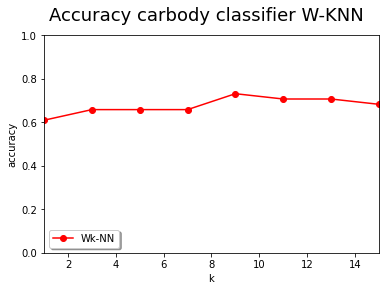

In [90]:
cwk_vals = [1,3,5,7,9,11,13,15]
cwkNN_accuracies = []

for k in cwk_vals:
    neighwc = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance') ### Don't miss this! Doing Regression here!!
    # fit (train) the model to the data
    neighwc.fit(train_data_normalized2, train_sln2)
    # use the trained model to get predictions from our test_data
    predictionswc = neighwc.predict(test_data_normalized2)
    current_accuracy = metrics.accuracy_score(test_sln2 ,predictionswc)
    cwkNN_accuracies.append(current_accuracy)


plt.suptitle('Accuracy carbody classifier W-KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(cwk_vals,cwkNN_accuracies,'ro-',label='Wk-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([1,15,0,1])

plt.show()

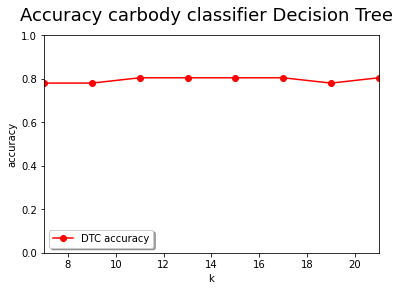

[0.7804878048780488, 0.7804878048780488, 0.8048780487804879, 0.8048780487804879, 0.8048780487804879, 0.8048780487804879, 0.7804878048780488, 0.8048780487804879]


In [91]:
dtc_vals = [7,9,11,13,15,17,19,21]
dtc_accuracies = []

for k in dtc_vals:
    dtc = tree.DecisionTreeClassifier(max_depth = k)
#4. Call fit (to train the classification/regression model)
    dtc.fit(train_data_normalized2, train_sln2)
#5. Call predict to generate predictions
    C_predictions = dtc.predict(test_data_normalized2)
    current_accuracy = metrics.accuracy_score(test_sln2 ,C_predictions)
    dtc_accuracies.append(current_accuracy)


plt.suptitle('Accuracy carbody classifier Decision Tree',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(dtc_vals,dtc_accuracies,'ro-',label='DTC accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([7,21,0,1])

plt.show()
print(dtc_accuracies)



#Found optimal max_depth at 13
#tested different features like max features and leaf nodes but found that they couldn't reliably lead to better results

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.

After seeing results for our knn, w-knn, and DT I decide to move forward with the decision tree because it had the best perfomance.

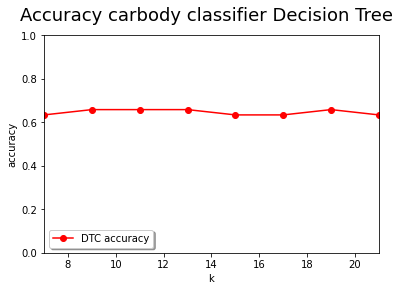

[0.6341463414634146, 0.6585365853658537, 0.6585365853658537, 0.6585365853658537, 0.6341463414634146, 0.6341463414634146, 0.6585365853658537, 0.6341463414634146]


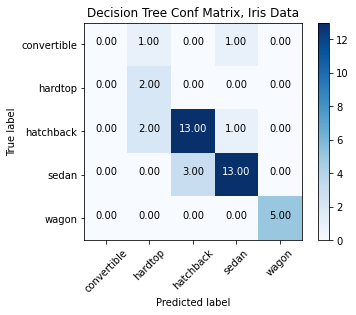

In [92]:

target3 = 'carbody'
predictors3 = ['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight']
train_data3, test_data3, train_sln3, test_sln3 = \
        train_test_split(clean_data2[predictors3], clean_data2[target3], test_size = 0.2, random_state=41)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data3)
train_data_normalized3 = scaler.transform(train_data3)
test_data_normalized3 = scaler.transform(test_data3)

dtc_vals3 = [7,9,11,13,15,17,19,21]
dtc_accuracies3 = []

for k in dtc_vals3:
    dtc = tree.DecisionTreeClassifier(max_depth = k)
#4. Call fit (to train the classification/regression model)
    dtc.fit(train_data_normalized3, train_sln3)
#5. Call predict to generate predictions
    C3_predictions = dtc.predict(test_data_normalized3)
    current_accuracy3 = metrics.accuracy_score(test_sln3 ,C3_predictions)
    dtc_accuracies3.append(current_accuracy3)
  


plt.suptitle('Accuracy carbody classifier Decision Tree',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(dtc_vals3,dtc_accuracies3,'ro-',label='DTC accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([7,21,0,1])

plt.show()

import itertools

cm=metrics.confusion_matrix(test_sln2,C_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, Iris Data')
plt.colorbar()
plt.xticks([0,1,2,3,4], dtc.classes_,rotation=45)
plt.yticks([0,1,2,3,4], dtc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(dtc_accuracies3)

- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

Text(0.5, 0, 'Predicted label')

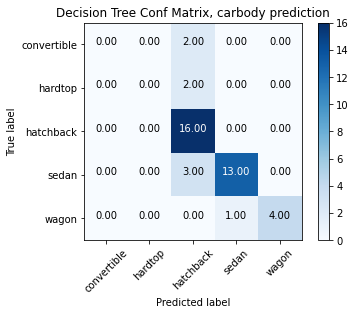

In [93]:
#Competition Code

target2 = 'carbody'
predictors2 = clean_data2.columns.drop(target2)
train_data2, test_data2, train_sln2, test_sln2 = \
        train_test_split(clean_data2[predictors2], clean_data2[target2], test_size = 0.2, random_state=41)
#code for Decision trees
dtc = tree.DecisionTreeClassifier(max_depth=3)
#4. Call fit (to train the classification/regression model)
dtc.fit(train_data_normalized2, train_sln2)
#5. Call predict to generate predictions
C_predictions = dtc.predict(test_data_normalized2)

import itertools

cm=metrics.confusion_matrix(test_sln2,C_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, carbody prediction')
plt.colorbar()
plt.xticks([0,1,2,3,4], dtc.classes_,rotation=45)
plt.yticks([0,1,2,3,4], dtc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')


At the end of the day I decided to stick with the above commented code for my final model because it gave the best results out of my trials. It ended with an R^2 value of .804 which I felt was pretty good for this model. I tried changing some of the default parameters and testing them with the graphs and found that changing the parameters actually led my model to decline in performance. I tried to take this simpler stance again when testing different data slices to predict for my model. I tried three different splits where one just had engine and performance variables, one which is still above which had strictly variables about the shape of the car, and one with only a few varaibles that described various parts of the car. Still the one that did the best was the one that had all the variables with a max_depth of 13. I tried all 3 learning models normalizedand fel like I didn't want over tune the parameters so I left it very plain. My predictions for my competition set is that it will not perform as well as it did on the testing set however I hope that it is vague enough that it won't drop too much when in comp.

*don't forget to print out a confusion matrix*

# Part 3: Conclusions

**Bumps in the Road**: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


I was lucky that I did not have to many challenges in the way of making this project. I was able to create my graphs and models pretty easily. A couple challenges came when trying to create different training datasets to see if different variables would work and I ended up just creating new train/ test split functions which ended up not being to bad. My original strategy was to find the parameters I wanted to use in the initial model phase and then test different variables in the fine tuning and I was able to do that without any issue so my strategy never really changed

**Conclusions:** What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

After this project I think I learned a lot about these machine learning models. Going into this project I assumed that there would be a lot of tweaking of parameters and a lot of testing to find the right parameters but that was not the case. After all of my testing it was pretty standard to leave most of the parameters as default which makes sense as SKlearn wants to use the best parameters most of the time which is why they are default. Therefore, I think my biggest insight is to keep your model basic and simple. Another thing I found interesting was when I tested carbody with the variables that strictly pertained to the size and shape of the car. I thought this subset would be perfect for fitting the model but it turns out it wasn't. In the end I found that You can make very good educated guesses with all of these models and they will do decent job of helping make predictions or forecasts for what you need.